## ROC curve
### also known as receiver operating characteristic originated in the radar engineering field during World War II.

It is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

Here we will simulate a data and try to understand what ROC curve really look like and what can it tell us.

start with 2 overlapping classes, each generated from a gaussian distribution. We can think of these classes as radar signals of friend airplanes and enemy airplanes (world war II scenario). The task is to develop a signal threshold at which we can call the receiving radar signal a friend signal or an enemy signal. The deviation in distribution represents the noise and uncertainty in the radar detection. So the overlap area between classes represents the ambiguous radar signals.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import pandas as pd
import seaborn as sns

In [15]:
class1 = np.random.normal(0.1,0.4,10000)
class2 = np.random.normal(0.6,0.3,10000)

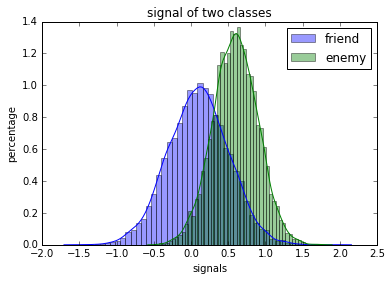

In [132]:
# Plot the two distributions.

sns.distplot(class1, label = 'friend')
sns.distplot(class2, label='enemy')
plt.title('signal of two classes')
plt.xlabel('signals')
plt.ylabel('percentage')
plt.legend()

Now we want to find a threshold to call which signal friends or enemy. This is represented as a vertical dash line through the histogram.

*Any signal lower than the threshold line will be classified as friend, and above will be enemy*

Notice that there are true friend above the threshold, and true enemy below the threshold. These are called false positive (false alarm) and false negative respectively. False positive is problematic because you don't want to shoot your friend airplanes that pass by, and false negative is bad also because you don't want enemy planes to pass unnoticed.

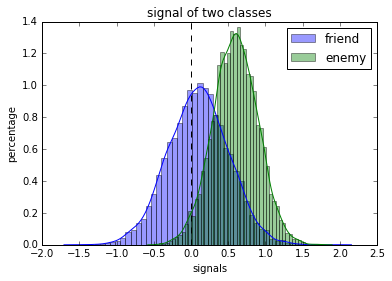

In [931]:
sns.distplot(class1, label = 'friend')
sns.distplot(class2, label = 'enemy')
plt.title('signal of two classes')
plt.xlabel('signals')
plt.ylabel('percentage')
plt.vlines(0,0,1.4, colors='k', linestyles='dashed')
plt.legend()

Now let us create a confusion matrix representing our signal classification. Then we will plot how well we can classify with different threshold values

In [135]:
def count_classification(classA_friend,classB_foe,threshold):
    """args: classA and class B as numpy array and threshold as floating point number
    return 4 floating point numbers, corresponding to 
    true positive rate, true negative rate, false positive rate, and false negative rate."""
    
    designated_friend_as_friend = np.where(classA_friend < threshold)[0]
    designated_friend_as_foe = np.where(classA_friend > threshold)[0]
    
    designated_foe_as_friend = np.where(classB_foe < threshold)[0]
    designated_foe_as_foe = np.where(classB_foe > threshold)[0]
    
    true_positive = len(designated_foe_as_foe)/(len(classB_foe))
    true_negative = len(designated_friend_as_friend)/(len(classA_friend))
    
    false_positive = len(designated_friend_as_foe)/(len(classB_foe))
    false_negative = len(designated_foe_as_friend)/(len(classA_friend))
    
    return true_positive, true_negative, false_positive, false_negative

In [947]:
true_pos, true_neg, false_pos, false_neg = count_classification(class1,class2,0.5)

Text(0.5, 1, 'Confusion Matrix')

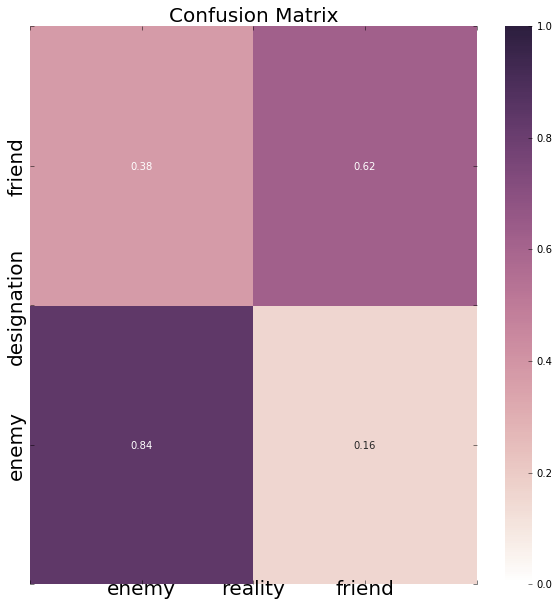

In [948]:
df_cm = pd.DataFrame(np.array([[true_neg,false_pos],[false_neg,true_pos]]), index = [ 'class1','class2'],columns = ['class1','class2'])

fig = plt.figure(figsize=(10,10))

plt.clf()

ax = fig.add_subplot()

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=1.0, fmt='.2f', cmap=cmap)

res.invert_yaxis()

plt.yticks([0,0.5,1,1.5,2], ['','enemy','designation','friend'],va='center',fontsize=20)
plt.xticks([0,0.5,1,1.5,2], ['','enemy','reality','friend'],va='center',fontsize=20)
plt.title('Confusion Matrix',fontsize=20)

## Next if we plot the false positive rate vs true postive rate at this threshold. We will get a point representing how well this threshold able to detect friends from enemy. 

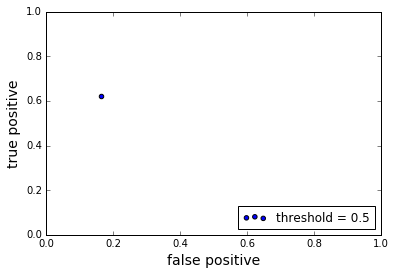

In [950]:
plt.scatter(false_pos,true_pos, label = 'threshold = 0.5')
plt.ylim(0,1)
plt.xlim(0,1)
plt.xlabel('false positive',fontsize=14)
plt.ylabel('true positive',fontsize=14)
plt.legend(loc = 'lower right')

## Now if we have plot the false positive vs true positive at different thresholds, we will be able to see which threshold gives us the most optimal prediction (i.e. high true positive and low false positive). The plot is the ROC curve.

In [951]:
# generate a list of threshold
threshold_list = np.linspace(-1,2,50)

In [952]:
false_pos_list = []
true_pos_list = []
false_neg_list = []
true_neg_list = []
for i in threshold_list:
    true_pos, true_neg, false_pos, false_neg = count_classification(class1,class2,i)
    false_pos_list.append(false_pos)
    false_neg_list.append(false_neg)
    true_neg_list.append(true_neg)
    true_pos_list.append(true_pos)

In [953]:
false_pos_list2 = []
true_pos_list2 = []
for i in threshold_list:
    true_pos, true_neg, false_pos, false_neg = count_classification(class1,class1,i)
    false_pos_list2.append(false_pos)
    true_pos_list2.append(true_pos)

Text(0.5, 1.0, 'ROC curve')

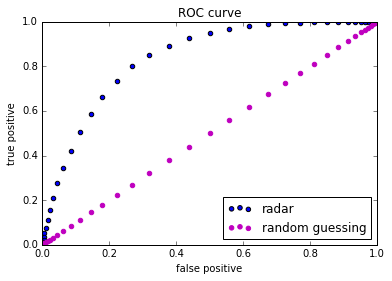

In [954]:
plt.scatter(false_pos_list,true_pos_list,label = 'radar')
plt.scatter(false_pos_list2,true_pos_list2,label = 'random guessing', color = 'm')
plt.ylim(0,1)
plt.xlim(0,1)
plt.xlabel('false positive')
plt.ylabel('true positive')
plt.legend(loc = 'best')
plt.title('ROC curve')

Note that the diagonal line represents random guessing, that is to say the rate of getting true positive and false positive is the same.

Suppose we have an improved radar detection mechanism, that is to say, it reduces noise in the system and help detect the true signal (standard deviation of the two class-generating guassian distribution should be reduced). We will see two signal distributions more separated, and we should have a better ROC curve.

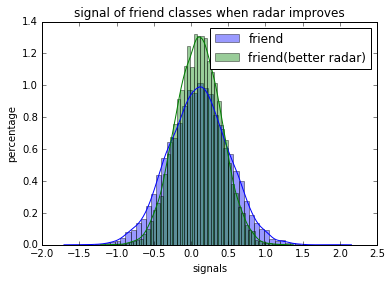

In [157]:
class3 = np.random.normal(0.1,0.3,10000)
sns.distplot(class1, label = 'friend')
sns.distplot(class3, label='friend(better radar)')
plt.title('signal of friend classes when radar improves')
plt.xlabel('signals')
plt.ylabel('percentage')
plt.legend(loc = 'best')

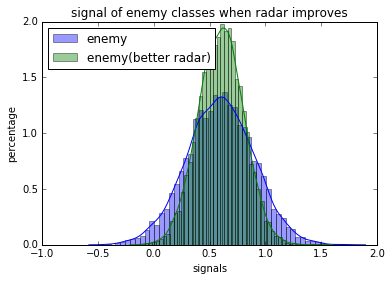

In [158]:
class4 = np.random.normal(0.6,0.2,10000)
sns.distplot(class2, label = 'enemy')
sns.distplot(class4, label='enemy(better radar)')
plt.title('signal of enemy classes when radar improves')
plt.xlabel('signals')
plt.ylabel('percentage')
plt.legend(loc = 'best')

In [159]:
false_pos_list_improved = []
true_pos_list_improved = []
for i in threshold_list:
    true_pos, true_neg, false_pos, false_neg = count_classification(class3,class4,i)
    false_pos_list_improved.append(false_pos)
    true_pos_list_improved.append(true_pos)

Text(0.5, 1.0, 'ROC curve')

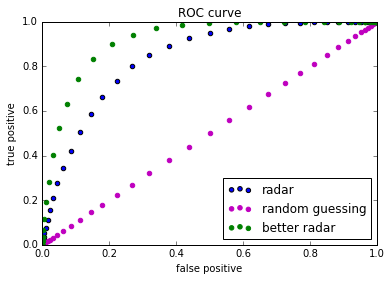

In [161]:
plt.scatter(false_pos_list,true_pos_list,label = 'radar')
plt.scatter(false_pos_list2,true_pos_list2,label = 'random guessing', color = 'm')
plt.scatter(false_pos_list_improved,true_pos_list_improved, label ='better radar', color = 'g')
plt.ylim(0,1)
plt.xlim(0,1)
plt.xlabel('false positive')
plt.ylabel('true positive')
plt.legend(loc = 'best')
plt.title('ROC curve')

Note that the better radar gives us ROC curve that is moving towards the upper left corner. At the upper left corner is a point at which the true postive rate is 1 while the false positive rate is 0. This is the perfect detection. So it makes sense that when the signal detection is improved the resulting ROC curve moves in the direction.